In [2]:
import numpy as np
from scipy.special import expit
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [3]:
# data = np.loadtxt('train_MNIST.csv', dtype = str, delimiter = ',')
# y = np.asarray(data[1:, 0:1], dtype='float')
# X = np.asarray(data[1:,1:], dtype='float')

In [4]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

In [117]:
# %load perceptron_object

import numpy as np
import matplotlib.pyplot as plt
import random as rd
from sklearn.model_selection import train_test_split

# data = np.loadtxt('train_MNIST.csv', dtype = str, delimiter = ',')
# y = np.asarray(data[1:, 0:1], dtype='float')
# X = np.asarray(data[1:,1:], dtype='float')

class Perceptron(object):
	def __init__(self, data, labels, alpha = .1, iteration = 30, test_percentage = .9, binary = False):
		self.X = self.add_ones(data)
		self.y = labels
		self.alpha = alpha
		self.iteration = iteration
		self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=test_percentage, random_state=42)
		self.weights = self.all_numbers(self.X_train, self.y_train, self.iteration, self.alpha)
		self.accuracy = self.test_all(self.X_test, self.y_test, self.weights)
		if binary:
			self.w = self.create_weights(self.X_train)
			self.binary_weigths = self.train_perceptron(self.X_train, self.y_train, self.w, alpha = self.alpha, iterations = self.iteration)
			self.tp = self.test_perceptron_f(self.X_test, self.y_train, self.w)

	def add_ones(self, x):
	 	a, b = np.shape(x)
		c = np.ones((a , 1))   
		return np.hstack((c, x))

	def img(self, row, data):

		image = np.zeros((28,28))
		for i in range(0,28):
			for j in range(0,28):
				pix = 28*i+j
				image[i,j] = data[row, pix]
		plt.imshow(image, cmap = 'gray')
		plt.show()

	def create_weights(self, data):
		a, b = np.shape(data)
		weights = np.random.rand(b,1)
		return weights

	def predict(self, data_point, weights):
		b = np.dot(data_point, weights)
		a = b>0
		return a*1

	def one_number(self, labels, number):
		return (labels == number)*1

	def update(self, weights, data_point, labels, alpha=.1):
		predicted = self.predict(data_point, weights)
		weight_temp = np.zeros(np.shape(weights))
		weight_temp[:,0] = alpha*(labels-predicted)*data_point
		return weight_temp+weights

	def train_perceptron(self, data, labels, weights, alpha = .1, iterations = 100):
		for j in range(0, iterations):
			for i in range(0, len(data)):
				weights = self.update(weights, data[i], labels[i], alpha)
		return weights

	def test_perceptron_f(self, data, labels, weights):
	    a,b = np.shape(data)
	    predicted = self.predict(data, weights)
	    correct = (predicted==labels)*1==1
	    true_pos = np.sum((labels==1)*(correct))
	    true_neg = np.sum((labels==0)*(correct))
	    tp_p = true_pos/float(np.sum(labels))
	    print np.sum(labels)
	    tn_p = true_neg/float(a- np.sum(labels))
	    return true_pos, true_neg, tp_p, tn_p, a
	    
	def all_numbers(self, data,labels, iterations, alpha):
		c,d = np.shape(data)
		w = self.create_weights(data)
		weights = []
		for i in range(0,  len(np.unique(labels))):
			z = self.one_number(labels, i)
			a = self.train_perceptron(data, z, w, alpha, iterations)
			weights.append(a[:,0])
		return np.asarray(weights)

	def one_all(self, data, weights):
		a = np.dot(data,np.transpose(weights))
		b = len(np.shape(data))
		if b == 1:
			return np.argmax(a)
		return np.argmax(a, axis=1)


	def test_all(self, data, labels, weights):
		a, b = np.shape(labels)
		predicted = self.one_all(data, weights)
		correct = predicted == labels[:,0]
		accuracy = np.sum(correct)/float(a)
		return accuracy




In [118]:
data = np.loadtxt('sin.csv', delimiter = ',')

In [109]:
Per = Perceptron(data[:,0:2], data[:,2:3], alpha = .0001, iteration = 2000, test_percentage = .5, binary = True)

AttributeError: 'Perceptron' object has no attribute 'data'

In [ ]:
Per.weights


In [ ]:
def plot_weights(w):
    x = np.arange(-1,11,.01)
    y = (-w[0]-w[1]*x)/w[2]
    plt.plot(x,y)
plot_weights(Per.weights[1,:])
    
for i in range(0,500):
    if data[i,2] == 1:
        plt.scatter(data[i,0], data[i,1], color = 'blue')
    else:
        plt.scatter(data[i,0], data[i,1], color = 'red')
plt.show()
    

    


In [ ]:
Per.accuracy

#although we can mess with the learning rates and see if we can find a slightly better boundry
#(this one, just looking at it doesn't look perfect).  But we're never gonna be able to liearly sperate it
# Clearly a linear funtion doesn't work here
# we can try to fit a curved boundry layer

In [112]:
def quadratic(data):
    return np.transpose(np.vstack((data[:,0], data[:, 1], data[:,0]*data[:,1], data[:,0]**2, data[:,1]**2)))

In [113]:
new_data = quadratic(data[:, 0:2])

In [114]:
print data[0,:]

[ 1.45005997  4.76356469  0.        ]


In [115]:
print np.shape(new_data), np.shape(data[:,2:3])

(500, 5) (500, 1)


In [141]:
Per_q = Perceptron(new_data, data[:,2:3], alpha = .0005, iteration = 500, test_percentage = .3, binary = True)

142.0


/Users/teacher/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:69: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


### Per_q = Perceptron(new_data, data[:,2:3], alpha = .001, iteration = 33000, test_percentage = .3)

In [142]:
Per_q.weights

array([[ 0.48679367, -0.59284917,  0.81960434, -0.10957204,  0.09155831,
        -0.07387873],
       [ 0.00929367,  0.40579066, -0.84408496,  0.13178947, -0.07275857,
         0.04795837]])

In [143]:
def quad(a,b,c):
    dis = (((b**2-4*a*c))**.5)
    return (-b+dis)/float(2*a)
    

In [144]:
def y(x, w):
    a = w[5]
    b = x*w[3]+w[2]
    c = w[0]+w[1]*x+w[4]*x*x
    return quad(a,b,c)

In [145]:
xs = np.arange(0,10,.1)

In [146]:
ys = y(xs, Per_q.binary_weigths)

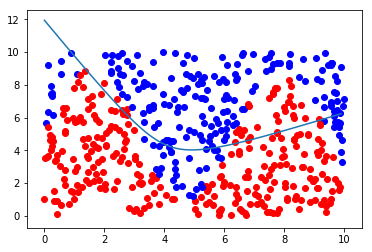

In [147]:
    
for i in range(0,500):
	if data[i,2] == 1:
		plt.scatter(data[i,0], data[i,1], color = 'blue')
	else:
		plt.scatter(data[i,0], data[i,1], color = 'red')

plt.plot(xs, ys)
plt.show()
    


In [148]:
Per_q.accuracy

0.76666666666666672